Depedencies Adding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

Importing the models

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

Data Set Importing

In [3]:
# loading the disbetes dataset to a pandas DataFrame
dset = pd.read_csv('/content/garments_worker_productivity (1).csv')

In [4]:
# printing the first 5 rows of the datasets
dset.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [5]:
dset.tail()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.9,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.9,NaN,1800,0,0.0,0,0,15.0,0.505889
1196,3/11/2015,Quarter2,finishing,Wednesday,6,0.70,2.9,NaN,720,0,0.0,0,0,6.0,0.394722


In [6]:
# Looking at the columns
dset.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [7]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [8]:
# Checking the number of missing values
dset.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [9]:
print(dset.department.value_counts())
print(dset.quarter.value_counts())
print(dset.day.value_counts())

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64


In [10]:
dset['wip'].fillna(int(dset['wip'].mean()), inplace=True)

In [11]:
dset=dset.replace(['finishing '], ['finishing'])

In [12]:
print(dset.department.value_counts())

sweing       691
finishing    506
Name: department, dtype: int64


In [13]:
# number of rows and columns in this dataset
dset.shape

(1197, 15)

In [14]:
# getting the statical measures of the data
dset.describe

<bound method NDFrame.describe of            date   quarter department        day  team  targeted_productivity  \
0      1/1/2015  Quarter1     sweing   Thursday     8                   0.80   
1      1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2      1/1/2015  Quarter1     sweing   Thursday    11                   0.80   
3      1/1/2015  Quarter1     sweing   Thursday    12                   0.80   
4      1/1/2015  Quarter1     sweing   Thursday     6                   0.80   
...         ...       ...        ...        ...   ...                    ...   
1192  3/11/2015  Quarter2  finishing  Wednesday    10                   0.75   
1193  3/11/2015  Quarter2  finishing  Wednesday     8                   0.70   
1194  3/11/2015  Quarter2  finishing  Wednesday     7                   0.65   
1195  3/11/2015  Quarter2  finishing  Wednesday     9                   0.75   
1196  3/11/2015  Quarter2  finishing  Wednesday     6                   0.70   

     

In [15]:
# loading the dataset to a pandas dataframe
p_dataframe = pd.DataFrame(dset)

In [16]:
# Print first 5 rows of dataframe
p_dataframe.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1190.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [20]:
# check for missing values
p_dataframe.isnull().sum()


date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

Data Encoding part

In [21]:
print(dset.department.value_counts())
print(dset.quarter.value_counts())
print(dset.day.value_counts())

sweing       691
finishing    506
Name: department, dtype: int64
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64


In [22]:
p_dataframe.replace({'department':{'sweing':0,'finishing':1}},inplace=True)
p_dataframe.replace({'quarter':{'Quarter1':0,'Quarter2':1,'Quarter3':2,'Quarter4':3,'Quarter5':4}},inplace=True)
p_dataframe.replace({'day':{'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Saturday':5}},inplace=True)

In [23]:
p_dataframe.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,0,0,4,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,0,1,4,1,0.75,3.94,1190.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,0,0,4,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,0,0,4,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,0,0,4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [25]:
p_dataframe.tail()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1192,3/11/2015,1,1,3,10,0.75,2.9,1190.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,1,1,3,8,0.70,3.9,1190.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,1,1,3,7,0.65,3.9,1190.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,1,1,3,9,0.75,2.9,1190.0,1800,0,0.0,0,0,15.0,0.505889
1196,3/11/2015,1,1,3,6,0.70,2.9,1190.0,720,0,0.0,0,0,6.0,0.394722


In [26]:
# getting statistical measures of the data
p_dataframe.describe()


,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,1.399332,0.422723,2.469507,6.426901,0.729632,15.062172,1190.269006,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,1.215535,0.494199,1.694506,3.463963,0.097891,10.943219,1395.647280,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,0.000000,0.000000,0.000000,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,0.000000,0.000000,1.000000,3.000000,0.700000,3.940000,970.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,1.000000,0.000000,2.000000,6.000000,0.750000,15.260000,1190.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,2.000000,1.000000,4.000000,9.000000,0.800000,24.260000,1190.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,4.000000,1.000000,5.000000,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


Data Analysis 

Bar charts

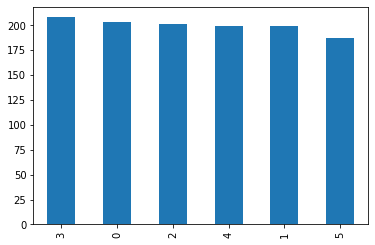

In [27]:
p_dataframe.day.value_counts().plot(kind='bar')


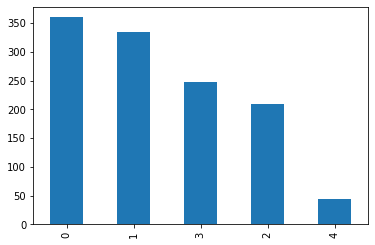

In [29]:
p_dataframe.quarter.value_counts().plot(kind='bar')

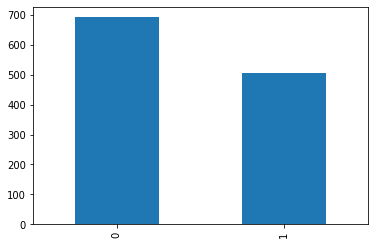

In [30]:
p_dataframe.department.value_counts().plot(kind='bar')

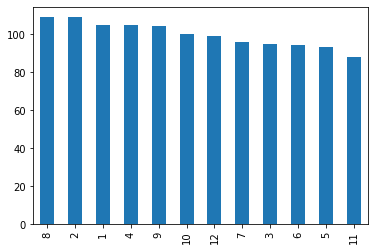

In [31]:
p_dataframe.team.value_counts().plot(kind='bar')

Histogram Using

In [34]:
# Separate categorical and numerical data for simplicity in analysis
#category = p_dataframe.select_dtypes(include='object')
numerical = p_dataframe.select_dtypes(exclude='object')

In [35]:
numerical.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

quarter


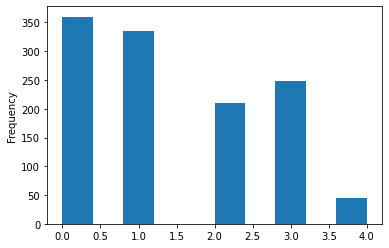

department


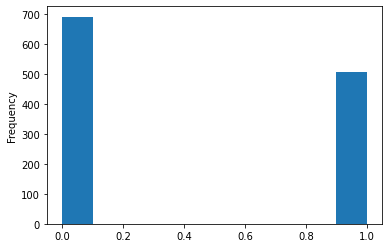

day


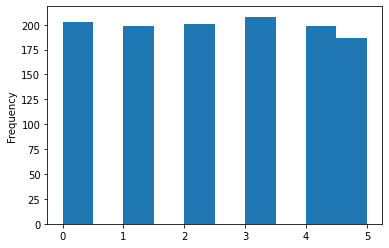

team


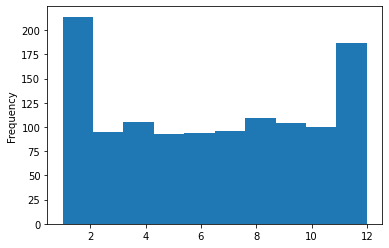

targeted_productivity


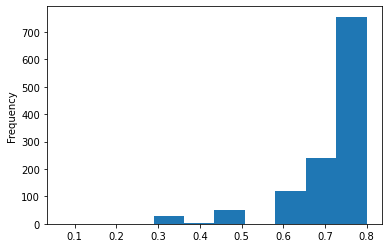

smv


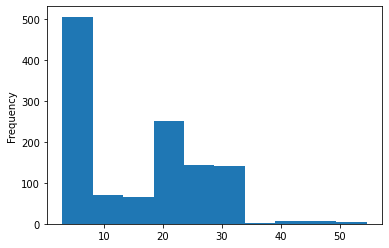

wip


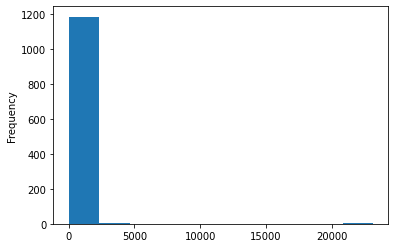

over_time


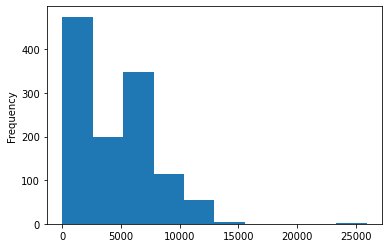

incentive


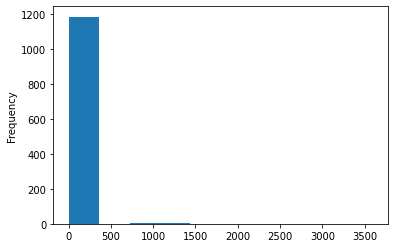

idle_time


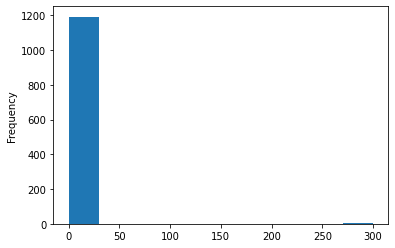

idle_men


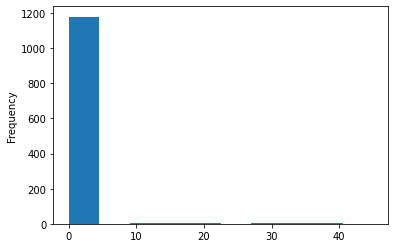

no_of_style_change


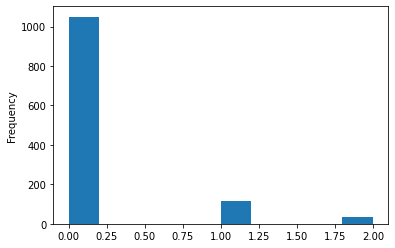

no_of_workers


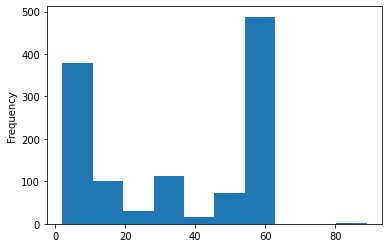

actual_productivity


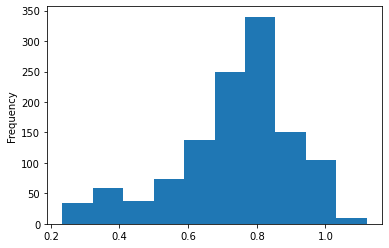

In [36]:
for i in range(len(numerical.columns)):
    print(numerical.columns[i])
    numerical.iloc[:, i].plot(kind='hist')
    plt.show()

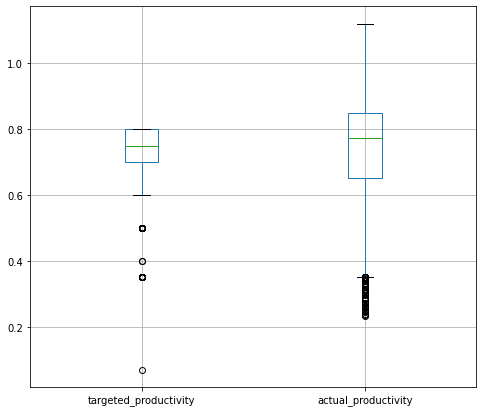

In [37]:
numerical.boxplot(column = [ 'targeted_productivity', 'actual_productivity'],figsize=(8,7))

Text(0.5, 1.0, 'average work in progress for each department')

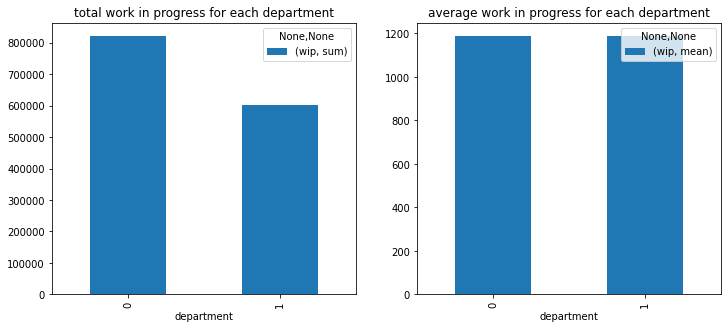

In [38]:
fig, ax = plt.subplots(ncols=2,figsize=(12,5))
p_dataframe.groupby(['department']).agg({'wip':['sum']}).plot(ax=ax[0], kind = 'bar')
ax[0].set_title('total work in progress for each department')
p_dataframe.groupby(['department']).agg({'wip':['mean']}).plot(ax=ax[1], kind = 'bar')
ax[1].set_title('average work in progress for each department')

Text(0.5, 1.0, 'Average Actual Productivity for each department')

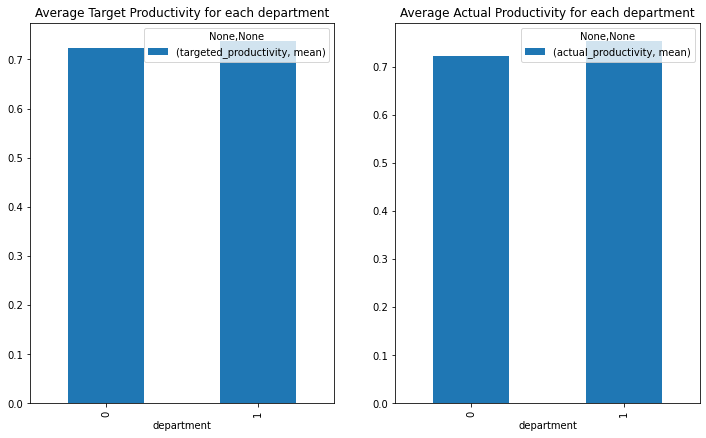

In [39]:
fig, ax = plt.subplots(ncols=2,figsize=(12,7))
p_dataframe.groupby(['department']).agg({'targeted_productivity':['mean']}).plot(ax=ax[0], kind = 'bar')
ax[0].set_title('Average Target Productivity for each department')
p_dataframe.groupby(['department']).agg({'actual_productivity':['mean']}).plot(ax=ax[1], kind = 'bar')
ax[1].set_title('Average Actual Productivity for each department')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


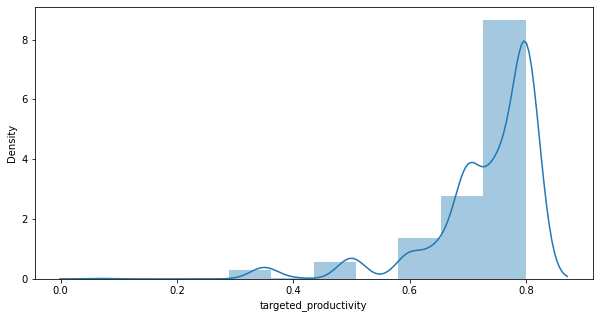

In [40]:
fig, ax = plt.subplots(1,1,figsize = (10,5))
sns.distplot(p_dataframe['targeted_productivity'], bins = 10, ax = ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


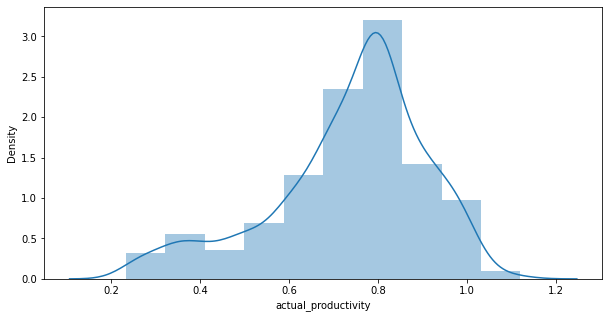

In [41]:
fig, ax = plt.subplots(1,1,figsize = (10,5))
sns.distplot(p_dataframe['actual_productivity'], bins = 10, ax = ax)
plt.show()

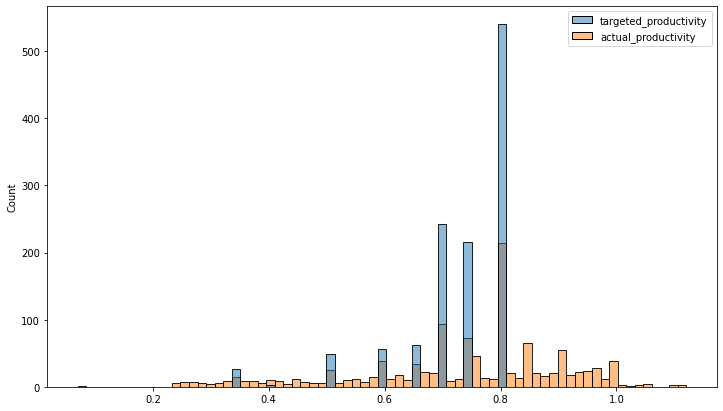

In [44]:
# import matplotlib.pyplot as plt
fig_dims = (12,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=p_dataframe[['targeted_productivity', 'actual_productivity']],ax=ax)
plt.show()

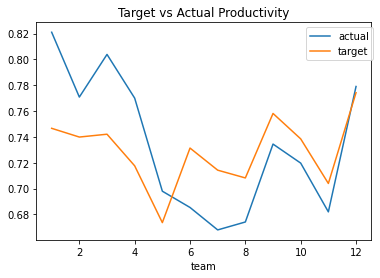

In [46]:
analysis = p_dataframe.groupby('team').agg(actual = ('actual_productivity','mean'), target = ('targeted_productivity', 'mean'))
analysis.plot(kind='line', title="Target vs Actual Productivity").legend(bbox_to_anchor= (1.02, 1));

Correlation checking

In [48]:
correlation = p_dataframe.corr()

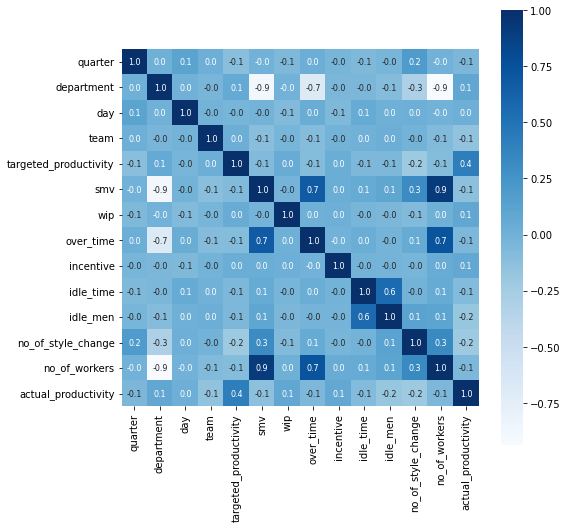

In [53]:
# create a heatmap 
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot=True, annot_kws={'size':8}, cmap = 'Blues')

Data Scalling

In [54]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale  = ['smv', 'wip', 'over_time', 'incentive', 'no_of_workers', 'idle_time', ]
min_max_scaler = MinMaxScaler()
p_dataframe[cols_to_scale] = min_max_scaler.fit_transform(p_dataframe[cols_to_scale])


In [55]:
p_dataframe.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,0,0,4,8,0.80,0.450252,0.047631,0.273148,0.027222,0.0,0,0,0.655172,0.940725
1,1/1/2015,0,1,4,1,0.75,0.020132,0.051179,0.037037,0.000000,0.0,0,0,0.068966,0.886500
2,1/1/2015,0,0,4,11,0.80,0.164731,0.041575,0.141204,0.013889,0.0,0,0,0.327586,0.800570
3,1/1/2015,0,0,4,12,0.80,0.164731,0.041575,0.141204,0.013889,0.0,0,0,0.327586,0.800570
4,1/1/2015,0,0,4,6,0.80,0.445219,0.050314,0.074074,0.013889,0.0,0,0,0.620690,0.800382


Splitting the data and Target data

In [56]:
X = p_dataframe.drop(['date','actual_productivity'],axis=1)
Y = p_dataframe['actual_productivity']

In [57]:
X.sample(5)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
342,2,0,2,10,0.7,0.379791,0.047631,0.388889,0.017500,0.0,0,0,0.620690
938,3,0,3,5,0.8,0.526520,0.000346,0.046296,0.013611,0.0,0,1,0.655172
168,1,0,5,5,0.5,0.346303,0.041488,0.296296,0.000000,0.0,0,0,0.620690
87,0,1,2,9,0.8,0.020132,0.051179,0.055556,0.000000,0.0,0,0,0.068966
124,0,0,3,11,0.8,0.560008,0.024270,0.381944,0.011111,0.0,0,0,0.609195


In [58]:
print(X)

      quarter  department  day  team  targeted_productivity       smv  \
0           0           0    4     8                   0.80  0.450252   
1           0           1    4     1                   0.75  0.020132   
2           0           0    4    11                   0.80  0.164731   
3           0           0    4    12                   0.80  0.164731   
4           0           0    4     6                   0.80  0.445219   
...       ...         ...  ...   ...                    ...       ...   
1192        1           1    3    10                   0.75  0.000000   
1193        1           1    3     8                   0.70  0.019357   
1194        1           1    3     7                   0.65  0.019357   
1195        1           1    3     9                   0.75  0.000000   
1196        1           1    3     6                   0.70  0.000000   

           wip  over_time  incentive  idle_time  idle_men  no_of_style_change  \
0     0.047631   0.273148   0.027222      

In [59]:
Y.head(5)

0    0.940725
1    0.886500
2    0.800570
3    0.800570
4    0.800382
Name: actual_productivity, dtype: float64

In [173]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [174]:
scaler.fit(X)

StandardScaler()

In [176]:
standardized_data = scaler.transform(X)

In [177]:
print(standardized_data)

[[-1.15168784 -0.85572897  0.90358619 ... -0.11300466 -0.3516175
   1.0992288 ]
 [-1.15168784  1.1685943   0.90358619 ... -0.11300466 -0.3516175
  -1.19926822]
 [-1.15168784 -0.85572897  0.90358619 ... -0.11300466 -0.3516175
  -0.18522542]
 ...
 [-0.32866077  1.1685943   0.31319718 ... -0.11300466 -0.3516175
  -1.19926822]
 [-0.32866077  1.1685943   0.31319718 ... -0.11300466 -0.3516175
  -0.88378824]
 [-0.32866077  1.1685943   0.31319718 ... -0.11300466 -0.3516175
  -1.28940536]]


In [192]:
X = standardized_data
Y = p_dataframe['actual_productivity']

Splitting Training and Test Data

In [193]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [194]:
print(X.shape, X_train.shape, X_test.shape)

(1197, 13) (837, 13) (360, 13)


In [181]:
input_shape = 13

Check best Algorithmn

Calculation of model evaluation using Metrics

In [182]:
metrics_Cal = pd.DataFrame(columns = [ 'Model Name','Mean Absolute Error','Mean Squared Error','R2 Squared Error'])
def evaluate_model(model,Y_actual,Y_Predicted, df): 
    mae=metrics.mean_absolute_error(Y_actual, Y_Predicted)
    mse=metrics.mean_squared_error(Y_actual, Y_Predicted)
    r2 = metrics.r2_score(Y_actual, Y_Predicted)
    df2 = {'Model Name':model,'Mean Absolute Error':mae,'Mean Squared Error':mse,'R2 Squared Error': r2}
    df = df.append(df2, ignore_index = True)
    return df

Linear Regression Model

In [183]:
linear = LinearRegression()

In [184]:
linear.fit(X_train,Y_train)

LinearRegression()

Linear Regression Model Evaluation

In [185]:
linear_predict = linear.predict(X_test)


In [ ]:
print(linear_predict)

In [187]:
metrics_Cal = evaluate_model('Linear Regression', Y_test, linear_predict, metrics_Cal)

In [188]:
# getting R squred error
error_score = metrics.r2_score(Y_test,linear_predict)
print("R squared Error : ", error_score)

R squared Error :  0.22945093419262952


In [71]:
metrics_Cal

,Model Name,Mean Absolute Error,Mean Squared Error,R2 Squared Error
0,Linear Regression,0.115333,0.024412,0.229902


Compare with actual values and predicted values in a plot

In [72]:
Y_test = list(Y_test)


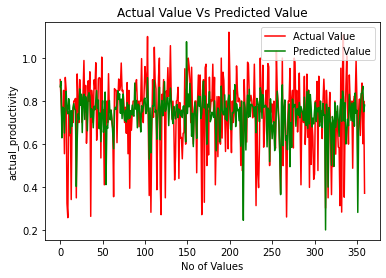

In [74]:
plt.plot(Y_test, color='red', label='Actual Value')
plt.plot(linear_predict, color='green', label='Predicted Value')
plt.title('Actual Value Vs Predicted Value')
plt.xlabel('No of Values')
plt.ylabel('actual_productivity')
plt.legend()
plt.show()


Decision Tree Model

In [76]:
DTree = DecisionTreeRegressor(random_state = 0)

In [77]:
DTree.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

Decision Tree Model Evaluating

In [78]:
DTree_predict = DTree.predict(X_test)

In [ ]:
print(DTree_predict)

In [81]:
metrics_Cal = evaluate_model('Decision Tree Regressor', Y_test, DTree_predict, metrics_Cal)

In [82]:
# getting R squred error
error_score = metrics.r2_score(Y_test,DTree_predict)
print("R squared Error : ", error_score)

R squared Error :  0.1690929720065142


In [83]:
metrics_Cal

,Model Name,Mean Absolute Error,Mean Squared Error,R2 Squared Error
0,Linear Regression,0.115333,0.024412,0.229902
1,Decision Tree Regressor,0.115333,0.024412,0.229902
2,Decision Tree Regressor,0.094622,0.026340,0.169093


Compare with actual values and predicted values in a plot

In [84]:
Y_test = list(Y_test)

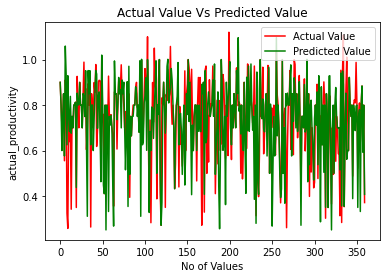

In [85]:
plt.plot(Y_test, color='red', label='Actual Value')
plt.plot(DTree_predict, color='green', label='Predicted Value')
plt.title('Actual Value Vs Predicted Value')
plt.xlabel('No of Values')
plt.ylabel('actual_productivity')
plt.legend()
plt.show()

Random Forest Model

In [195]:
RModel = RandomForestRegressor(n_estimators = 100)

In [196]:
RModel.fit(X_train,Y_train)

RandomForestRegressor()

RandomForest Model Evaluating

In [197]:
RModel_predict = RModel.predict(X_test)

In [198]:
print(RModel_predict)

[0.72108127 0.91727988 0.75267322 0.6385132  0.90417776 0.78934915
 0.81402991 0.97409169 0.8532445  0.74194934 0.48519676 0.65239983
 0.40382427 0.7329418  0.63731922 0.72706744 0.49642048 0.5539352
 0.85599734 0.91726643 0.71288002 0.87650257 0.84564203 0.51418157
 0.54241408 0.5659398  0.62587738 0.73514199 0.49076698 0.78319902
 0.89515942 0.72373934 0.82918274 0.68216339 0.85551708 0.56284973
 0.85298679 0.75434282 0.80366278 0.53766712 0.85355063 0.65608359
 0.75460365 0.53209383 0.74696965 0.58222452 0.67442288 0.50037353
 0.79060013 0.49785145 0.80040682 0.66019185 0.90459519 0.58348485
 0.80127536 0.91504814 0.78039389 0.80077919 0.61606545 0.56033091
 0.76681416 0.8019571  0.80966135 0.70976278 1.00517163 0.61222848
 0.91978739 0.40458557 0.73087101 0.98770839 0.70330106 0.60381177
 0.75261432 0.95862786 0.58778509 0.79714999 0.74487005 0.86136512
 0.87378191 0.69705545 0.5450943  0.88337678 0.82019472 0.79258999
 0.80766024 0.80305322 0.62328539 0.55594027 0.56606161 0.81122

In [199]:
metrics_Cal = evaluate_model('RandomForest Regressor', Y_test, RModel_predict, metrics_Cal)

In [200]:
metrics_Cal

,Model Name,Mean Absolute Error,Mean Squared Error,R2 Squared Error
0,Linear Regression,0.110258,0.023247,0.229451
1,RandomForest Regressor,0.073681,0.014140,0.503446


Compare with actual values and predicted values in a plot

In [201]:
Y_test = list(Y_test)

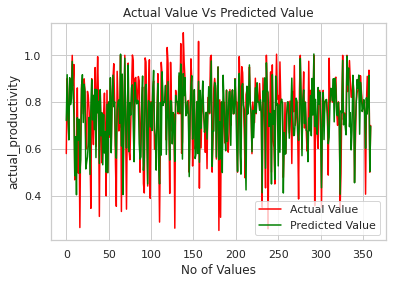

In [202]:
plt.plot(Y_test, color='red', label='Actual Value')
plt.plot(RModel_predict, color='green', label='Predicted Value')
plt.title('Actual Value Vs Predicted Value')
plt.xlabel('No of Values')
plt.ylabel('actual_productivity')
plt.legend()
plt.show()

Support Vector Machine Model

In [128]:
svModel = SVR(C=25) 

In [129]:
svModel.fit(X_train,Y_train)

SVR(C=25)

Support Vector Regressor Model Evaluation

In [130]:
svModel_predict = svModel.predict(X_test)

In [131]:
metrics_Cal = evaluate_model('Support Vector Regressor', Y_test, svModel_predict, metrics_Cal)

In [132]:
metrics_Cal

,Model Name,Mean Absolute Error,Mean Squared Error,R2 Squared Error
0,Linear Regression,0.115333,0.024412,0.229902
1,Decision Tree Regressor,0.115333,0.024412,0.229902
2,Decision Tree Regressor,0.094622,0.026340,0.169093
3,RandomForest Regressor,0.084591,0.017730,0.440701
4,RandomForest Regressor,0.084999,0.017823,0.437770
5,RandomForest Regressor,0.084470,0.017817,0.437953
6,Support Vector Regressor,0.084470,0.017817,0.437953
7,Support Vector Regressor,0.119092,0.025124,0.207452
8,Support Vector Regressor,0.113827,0.022862,0.278805


Compare with actual values and predicted values in a plot

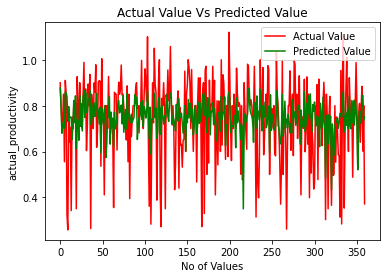

In [127]:
plt.plot(Y_test, color='red', label='Actual Value')
plt.plot(svModel_predict, color='green', label='Predicted Value')
plt.title('Actual Value Vs Predicted Value')
plt.xlabel('No of Values')
plt.ylabel('actual_productivity')
plt.legend()
plt.show()

ANN Model

In [136]:
from tensorflow import keras
from keras import models
from keras import layers
from keras import optimizers

In [139]:
ANNmodel = keras.Sequential([keras.layers.Dense(input_shape, input_shape=(input_shape,), activation='linear'),
                    keras.layers.Dense(1,activation='linear')
])

In [140]:
ANNmodel.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

In [ ]:
ANNmodel.fit(X_train, Y_train)

ANN model Evaluation

In [148]:
ANNmodel.evaluate(X_train, Y_train)

27/27 [==============================] - 1s 4ms/step - loss: 0.0211


0.021142810583114624

In [150]:
ANN_predict = ANNmodel.predict( X_test )
metrics_Cal = evaluate_model('ANN', Y_test, ANN_predict, metrics_Cal)

In [151]:
metrics_Cal

,Model Name,Mean Absolute Error,Mean Squared Error,R2 Squared Error
0,Linear Regression,0.115333,0.024412,0.229902
1,Decision Tree Regressor,0.115333,0.024412,0.229902
2,Decision Tree Regressor,0.094622,0.026340,0.169093
3,RandomForest Regressor,0.084591,0.017730,0.440701
4,RandomForest Regressor,0.084999,0.017823,0.437770
5,RandomForest Regressor,0.084470,0.017817,0.437953
6,Support Vector Regressor,0.084470,0.017817,0.437953
7,Support Vector Regressor,0.119092,0.025124,0.207452
8,Support Vector Regressor,0.113827,0.022862,0.278805
9,ANN,0.118319,0.024692,0.221072


Compare with actual values and predicted values in a plot

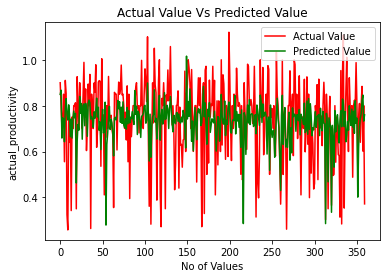

In [152]:
plt.plot(Y_test, color='red', label='Actual Value')
plt.plot(ANN_predict, color='green', label='Predicted Value')
plt.title('Actual Value Vs Predicted Value')
plt.xlabel('No of Values')
plt.ylabel('actual_productivity')
plt.legend()
plt.show()

Deep Neural Network Model

In [153]:
DNNmodel = keras.Sequential([
                          keras.layers.Dense(input_shape, input_shape=(input_shape,), activation='linear'),
                          keras.layers.Dense(64, activation='linear'),
                          keras.layers.Dense(32, activation='linear'),
                          keras.layers.Dense(1,activation='linear')
])

In [154]:
DNNmodel.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

In [ ]:
DNNmodel.fit(X_train, Y_train, epochs=100)

DNN Model Evaluation

In [158]:
DNNmodel.evaluate(X_train, Y_train)

27/27 [==============================] - 0s 4ms/step - loss: 0.0357


0.03571990132331848

In [159]:
DNN_predict = DNNmodel.predict( X_test )
metrics_Cal = evaluate_model('DNN', Y_test, DNN_predict, metrics_Cal)

In [160]:
metrics_Cal

,Model Name,Mean Absolute Error,Mean Squared Error,R2 Squared Error
0,Linear Regression,0.115333,0.024412,0.229902
1,Decision Tree Regressor,0.115333,0.024412,0.229902
2,Decision Tree Regressor,0.094622,0.026340,0.169093
3,RandomForest Regressor,0.084591,0.017730,0.440701
4,RandomForest Regressor,0.084999,0.017823,0.437770
5,RandomForest Regressor,0.084470,0.017817,0.437953
6,Support Vector Regressor,0.084470,0.017817,0.437953
7,Support Vector Regressor,0.119092,0.025124,0.207452
8,Support Vector Regressor,0.113827,0.022862,0.278805
9,ANN,0.118319,0.024692,0.221072


Compare with actual values and predicted values in a plot

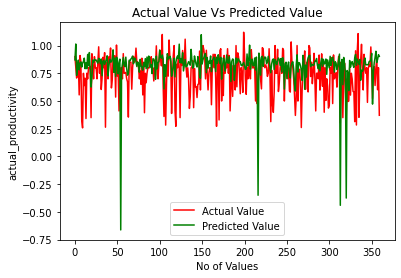

In [161]:
plt.plot(Y_test, color='red', label='Actual Value')
plt.plot(DNN_predict, color='green', label='Predicted Value')
plt.title('Actual Value Vs Predicted Value')
plt.xlabel('No of Values')
plt.ylabel('actual_productivity')
plt.legend()
plt.show()

In [162]:
Summary_metrics = metrics_Cal.drop([2, 4, 5,6,7], axis=0)
Summary_metrics

,Model Name,Mean Absolute Error,Mean Squared Error,R2 Squared Error
0,Linear Regression,0.115333,0.024412,0.229902
1,Decision Tree Regressor,0.115333,0.024412,0.229902
3,RandomForest Regressor,0.084591,0.017730,0.440701
8,Support Vector Regressor,0.113827,0.022862,0.278805
9,ANN,0.118319,0.024692,0.221072
10,DNN,0.148570,0.046094,-0.454069


Creating plot using R2 Value

In [168]:
plot_dset = Summary_metrics

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

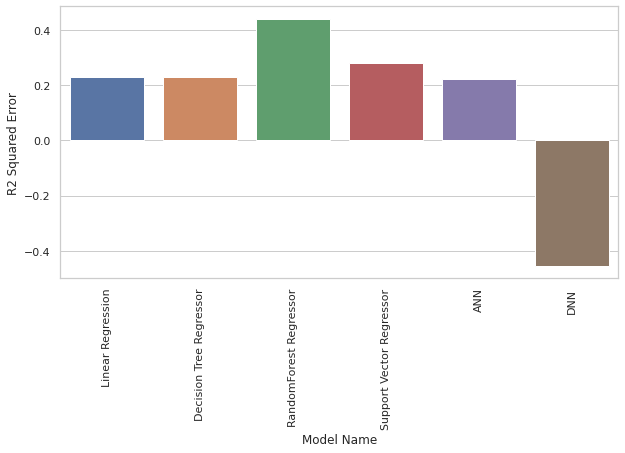

In [169]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Model Name", y="R2 Squared Error", data=plot_dset)
plt.xticks(rotation=90)

Custom Input Data

In [213]:
input_data = (1,1,4,8,0.8,26.16,1108,7080,98,0,0,0,59)

#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
#std_data = scaler.transform(input_data_reshaped)

prediction = RModel.predict(input_data_reshaped)
print('Your Productivity =',prediction)

Your Productivity = [0.93911974]


Save the Trained Model

In [214]:
import pickle

In [215]:
# file operation part
filename = 'productivity.sav'
pickle.dump(RModel, open(filename, 'wb')) 
# wb = written binary

In [216]:
# loading our model
# rb = reading binary
load_model = pickle.load(open('/content/productivity.sav','rb'))

In [217]:
input_data = (1,1,4,8,0.8,26.16,1108,7080,98,0,0,0,59)

#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
#std_data = scaler.transform(input_data_reshaped)

prediction = load_model.predict(input_data_reshaped)
print('Your Productivity =',prediction)

Your Productivity = [0.93911974]
